In [86]:
#Exploatory Data Analysis of all_Data stock data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
from scipy.stats import spearmanr
import warnings
warnings.filterwarnings("ignore")

In [59]:
#show the basic statistics of the data
all_Data=pd.read_csv("./data/ALL.csv",parse_dates=['DATE'])
print("all_Data.describe():\n",all_Data.describe(),'\n')

all_Data.describe():
                       DATE         Open         High          Low  \
count                 1827  1827.000000  1827.000000  1827.000000   
mean   2019-10-01 00:00:00    81.193234    82.117848    80.346227   
min    2017-04-01 00:00:00    35.305000    35.470001    35.112499   
25%    2018-07-01 12:00:00    43.776251    44.222499    43.560417   
50%    2019-10-01 00:00:00    56.812500    57.256248    56.393335   
75%    2020-12-30 12:00:00   123.509998   124.950001   122.073332   
max    2022-04-01 00:00:00   182.630005   182.940002   179.119995   
std                    NaN    44.172326    44.725979    43.640031   

             Close    Adj Close        Volume          DFF       T10Y2Y  
count  1827.000000  1827.000000  1.827000e+03  1827.000000  1827.000000  
mean     81.286302    79.203021  1.201334e+08     1.059962     0.597148  
min      34.464521    32.830929  1.726135e+07     0.040000    -0.050000  
25%      43.878750    41.824093  8.372580e+07     0.090000  

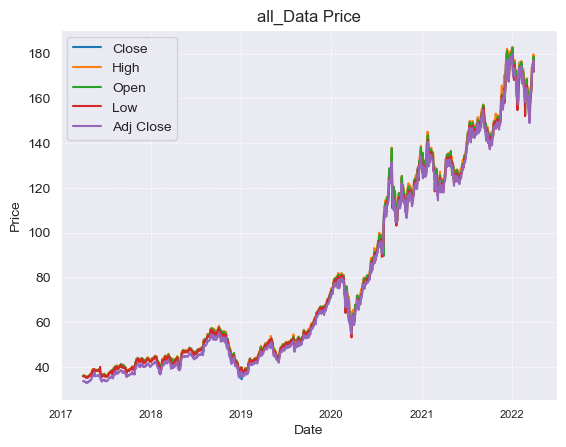

In [60]:
plt.title("all_Data Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.plot(all_Data['DATE'], all_Data['Close'],label='Close')
plt.plot(all_Data['DATE'], all_Data['High'],label='High')
plt.plot(all_Data['DATE'], all_Data['Open'],label="Open")
plt.plot(all_Data['DATE'], all_Data['Low'],label="Low")

plt.plot(all_Data['DATE'], all_Data['Adj Close'],label='Adj Close')
plt.legend()
plt.tick_params(axis='x', labelsize=8)
plt.savefig("./pictures/AAPLData.jpg")
# plt.hist(AAPLData, bins=50, edgecolor='black')

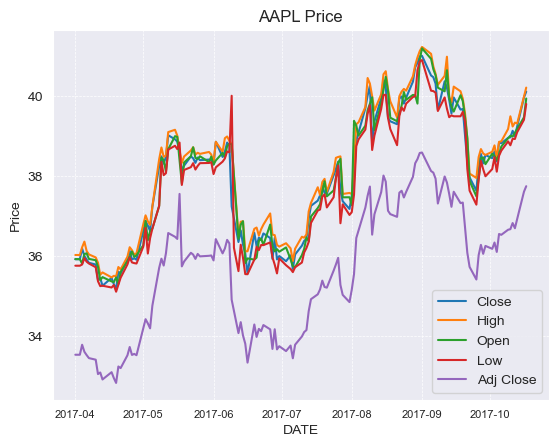

In [61]:
plt.clf()
plt.title("AAPL Price")
plt.xlabel("DATE")
plt.ylabel("Price")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
AAPL=all_Data[:200]
plt.plot(AAPL['DATE'], AAPL['Close'],label='Close')
plt.plot(AAPL['DATE'], AAPL['High'],label='High')
plt.plot(AAPL['DATE'], AAPL['Open'],label="Open")
plt.plot(AAPL['DATE'], AAPL['Low'],label="Low")

plt.plot(AAPL['DATE'], AAPL['Adj Close'],label='Adj Close')
plt.legend()
plt.tick_params(axis='x', labelsize=8)
plt.savefig("./pictures/AAPLData0-200.jpg")


In [62]:
plt.clf()
#show the correlation between the variables
correlation=all_Data[["Open","High","Low","Close","Adj Close","Volume"]].corr()

<Figure size 640x480 with 0 Axes>

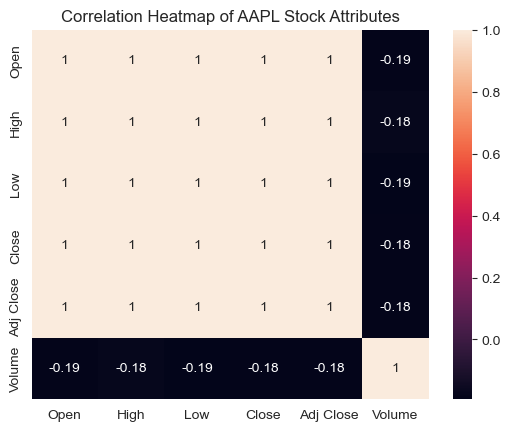

In [64]:
#heatmap of the correlation

sns.heatmap(correlation,annot=True)
plt.title("Correlation Heatmap of AAPL Stock Attributes")
plt.savefig("./pictures/heatmap_AAPL.jpg")


In [66]:
plt.clf()
all_Data=all_Data.drop(columns=["Open","High","Low","Adj Close","Volume"])
print("dataset with redundant attributes removed:\n",all_Data.head(),'\n')

KeyError: "['Open', 'High', 'Low', 'Adj Close', 'Volume'] not found in axis"

<Figure size 640x480 with 0 Axes>

In [67]:
#time series decomposition
AAPLclose=all_Data[['DATE','Close']].set_index('DATE')
decomposition = seasonal_decompose(AAPLclose, model='additive',period=120)

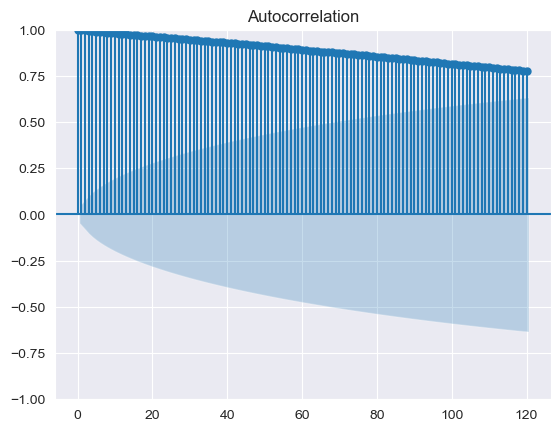

In [68]:
plot_acf(AAPLclose['Close'],lags=120) 
plt.savefig("./pictures/acf_AAPL.jpg") 


<Figure size 640x480 with 0 Axes>

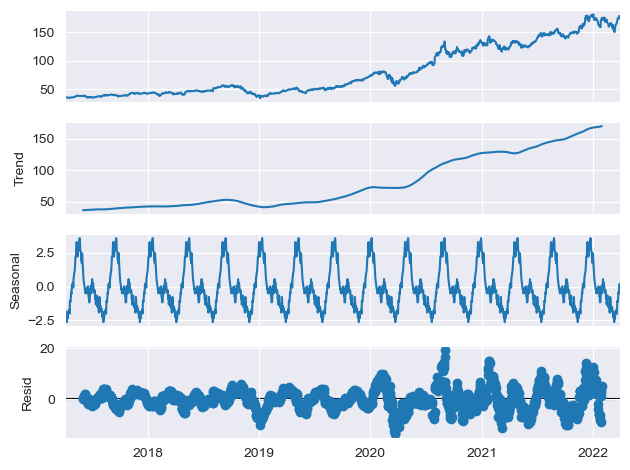

In [70]:
plt.clf()
decomposition.plot()
plt.savefig("./pictures/decomposition_AAPLClose.jpg")


linear function fitting:k=0.34,b=3.39.


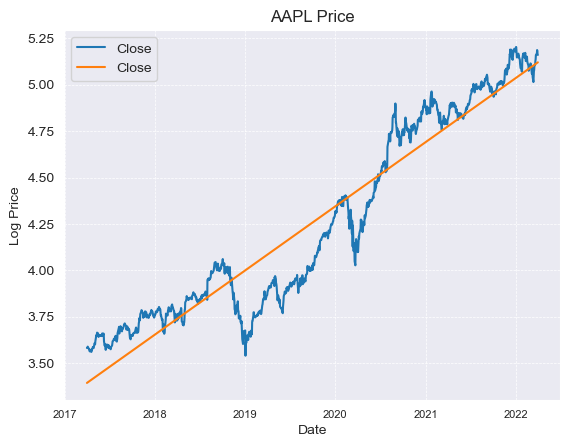

In [71]:
plt.clf()
plt.title("AAPL Price")
plt.xlabel("Date")
plt.ylabel("Log Price")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# apply log transform to "adj close" attribute
all_Data['logPrice']= all_Data['Close'].apply(lambda x:np.log(x)) 

timeOrder=all_Data['DATE'].apply(lambda x:x.toordinal())
timeOrder-=timeOrder[0]
poly= np.polyfit(timeOrder, all_Data['logPrice'],deg=1)
plt.plot(all_Data['DATE'],all_Data['logPrice'],label='Close')

#plot the linear fit,poly[0] is the slope and poly[1] is the intercept      
plt.plot(all_Data['DATE'],timeOrder*poly[0]+poly[1],label='Close')
plt.legend()
plt.tick_params(axis='x', labelsize=8)

plt.savefig("./pictures/AAPL_LogData_polyfit.jpg")
print("linear function fitting:k={:.2f},b={:.2f}.\n".format(poly[0]*355,poly[1]))


In [73]:
plt.clf()
#adf test(Augmented Dickey-Fuller (ADF) test) to test for stationarity
from statsmodels.tsa.stattools import adfuller
result=adfuller(all_Data['logPrice'])
print('ADF Statistic: {:.6f}'.format(result[0]))
print('p-value: {:.6f}'.format(result[1]))

ADF Statistic: -0.146823
p-value: 0.944570


<Figure size 640x480 with 0 Axes>

In [74]:
#first order difference to make the data stationary
all_Data['logPriceDiff']=all_Data['logPrice'].diff()
print("first order difference of AAPL:\n",all_Data['logPriceDiff'].head(),'\n')

first order difference of AAPL:
 0         NaN
1    0.000000
2    0.000000
3    0.007419
4   -0.005194
Name: logPriceDiff, dtype: float64 


In [75]:
result=adfuller(all_Data['logPriceDiff'].dropna())
print('ADF Statistic: {:.3f}'.format(result[0]))
print('p-value: {:.3f}'.format(result[1]))
mean=all_Data['logPriceDiff'].mean()
std=all_Data['logPriceDiff'].std()
print("mean=",mean)
print("std=",std)
print(f"one-year growth in the log scale=mean*365={mean*365*100:.4}%")


ADF Statistic: -11.317
p-value: 0.000
mean= 0.0008649517516388691
std= 0.014948019412344719
one-year growth in the log scale=mean*365=31.57%


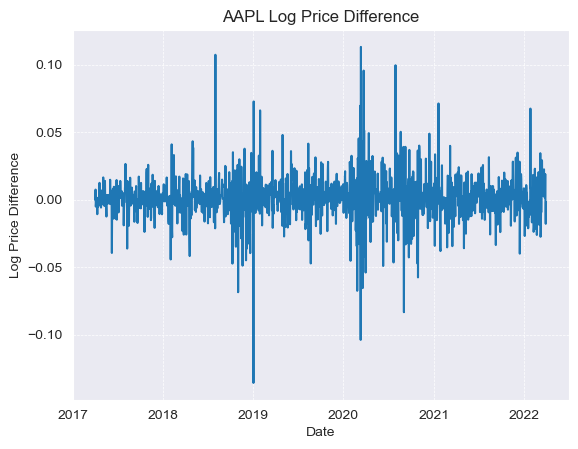

In [76]:
#EDA of the logPriceDiff
plt.plot(all_Data['DATE'],all_Data['logPriceDiff'])
plt.title("AAPL Log Price Difference")
plt.xlabel("Date")
plt.ylabel("Log Price Difference")
plt.grid(True, which='both', linestyle='--', linewidth=0.5) 
plt.savefig("./pictures/AAPL_LogPriceDiff.jpg")



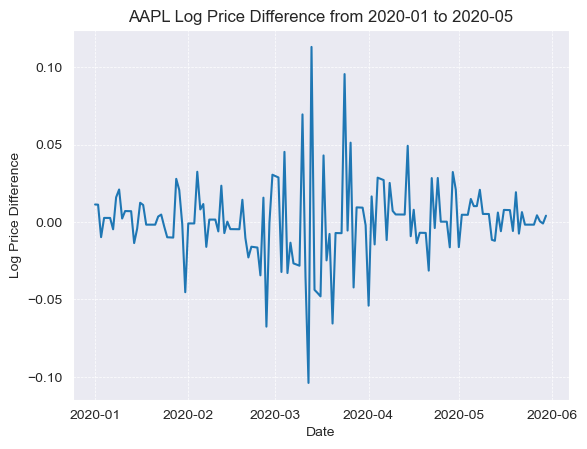

In [77]:
plt.clf()
#EDA of the logPriceDiff
filtered_AAPL = all_Data[(all_Data['DATE'] >= '2020-01-01') & (all_Data['DATE'] <= '2020-05-30')]
plt.plot(filtered_AAPL['DATE'],filtered_AAPL['logPriceDiff'])
plt.title("AAPL Log Price Difference from 2020-01 to 2020-05")
plt.xlabel("Date")
plt.ylabel("Log Price Difference")
plt.grid(True, which='both', linestyle='--', linewidth=0.5) 
plt.savefig("./pictures/AAPL_LogPriceDiff2020-01-2020-05.jpg")


In [81]:
plt.clf()
#Ljun-Box test
ljung_box_result = sm.stats.acorr_ljungbox(all_Data['logPriceDiff'][1:], lags=[i for i in range(1,20)], return_df=True)

print("lljung_box_result=\n",ljung_box_result.head())

lljung_box_result=
     lb_stat  lb_pvalue
1  1.631326   0.201520
2  2.385397   0.303401
3  2.385601   0.496321
4  2.402919   0.662100
5  2.972445   0.704234


<Figure size 640x480 with 0 Axes>

In [87]:
all_Data['Change_Percentage']=all_Data['Close'].pct_change() * 100 #calculate the percentage change of the stock price every day
invest_period=100#sum of the percentage change of the stock price in the next 100 days.
all_Data['future_sum'] =all_Data['Change_Percentage'].rolling(window=invest_period, min_periods=1).sum().shift(-invest_period+1)
all_Data['future_sum'].fillna(method='ffill', inplace=True)  #fill the NaN value with 0

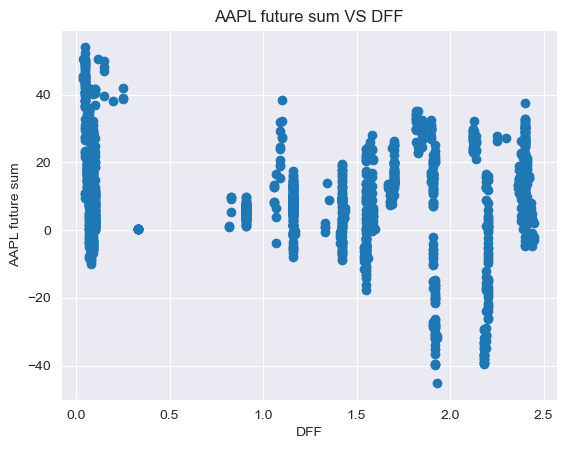

In [88]:
plt.scatter(all_Data['DFF'],all_Data['future_sum'])
plt.title("AAPL future sum VS DFF")
plt.xlabel("DFF")
plt.ylabel("AAPL future sum")
plt.savefig("./pictures/AAPL_future_sum_VS_DFF.jpg")

In [89]:
plt.clf()
correlation_coefficient, p_value = spearmanr(all_Data['DFF'],all_Data['future_sum'])
print('\n',"spearmanr test",'\n',"correlation_coefficient=",correlation_coefficient,'\n',"p_value=",p_value/2 )


 spearmanr test 
 correlation_coefficient= -0.04797820932491536 
 p_value= 0.02015636338182634


<Figure size 640x480 with 0 Axes>

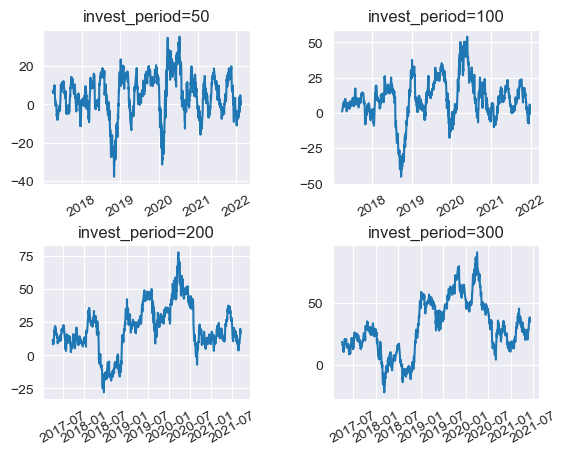

In [90]:
#The chart of AAPL's returns over a future period.
fig, axarr = plt.subplots(2, 2)

for index,invest_period in enumerate([50,100,200,300]):
    all_Data['Change_Percentage'][0]=0
    all_Data['future_sum'] = all_Data['Change_Percentage'].rolling(window=invest_period, min_periods=1).sum().shift(-invest_period+1)
    axarr[index // 2, index % 2].set_title("invest_period={}".format(invest_period))
    axarr[index // 2, index % 2].plot(all_Data['DATE'],all_Data['future_sum'])
    axarr[index // 2, index % 2].tick_params(axis='x', rotation=30)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.savefig("./pictures/Return Rate Curve")

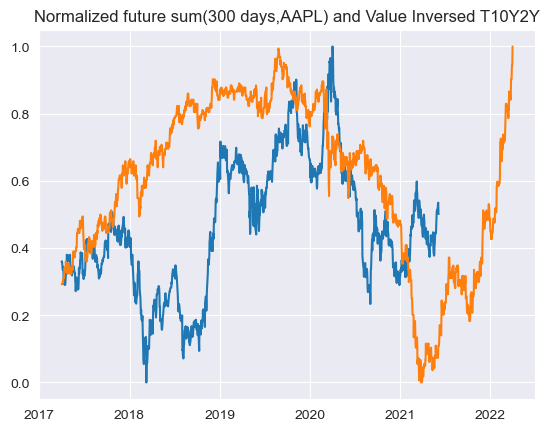

In [92]:
#plot the relation between Normalized future sum(300 days,AAPL) and Value Inversed T10Y2Y
normalize=(all_Data['future_sum'] - all_Data['future_sum'].min()) / (all_Data['future_sum'].max() - all_Data['future_sum'].min())
plt.plot(all_Data['DATE'],normalize)
normalize_T10Y2Y=(all_Data['T10Y2Y'] - all_Data['T10Y2Y'].min()) / (all_Data['T10Y2Y'].max() - all_Data['T10Y2Y'].min())
plt.plot(all_Data['DATE'], normalize_T10Y2Y*-1+1)
plt.title("Normalized future sum(300 days,AAPL) and Value Inversed T10Y2Y")
plt.savefig("./pictures/Normalized_future_sum_and_Value_Inversed_T10Y2Y.jpg")



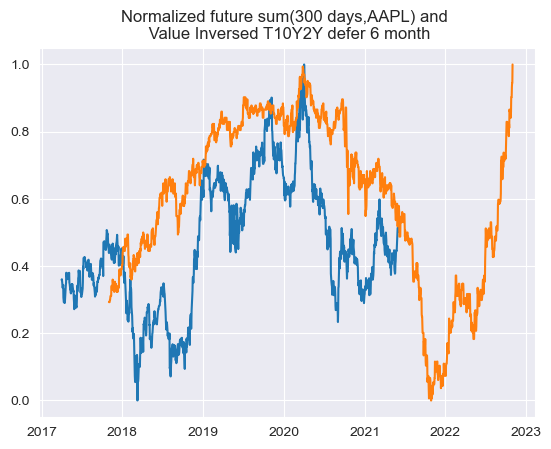

In [93]:
plt.clf()
#plot the relation between Normalized future sum(300 days,AAPL) and Value Inversed T10Y2Y defer 6 month
normalize_AAPL_return=(all_Data['future_sum'] - all_Data['future_sum'].min()) / (all_Data['future_sum'].max() - all_Data['future_sum'].min())
plt.plot(all_Data['DATE'],normalize_AAPL_return)
normalize_T10Y2Y=(all_Data['T10Y2Y'] - all_Data['T10Y2Y'].min()) / (all_Data['T10Y2Y'].max() - all_Data['T10Y2Y'].min())
plt.plot(all_Data['DATE']+pd.DateOffset(months=7), normalize_T10Y2Y*-1+1)
plt.title("Normalized future sum(300 days,AAPL) and \n Value Inversed T10Y2Y defer 6 month")
plt.savefig("./pictures/Normalized_future_sum_and_Value_Inversed_T10Y2Y_defer6month.jpg")
plt.show()

In [95]:
#find the best delay time
plt.clf()
value=[]
for i in range(400):
    corr=normalize_AAPL_return.corr(normalize_T10Y2Y.shift(i)*-1+1)
    value.append(corr)
max_value=max(value)
index=value.index(max_value)
print('find the best delay time\n',"max_value=","{:.2f}".format(max_value),'\n',"index=","{:.2f}".format(index),"\n","month=","{:.2f}".format(index/30))

find the best delay time
 max_value= 0.73 
 index= 224.00 
 month= 7.47


<Figure size 640x480 with 0 Axes>

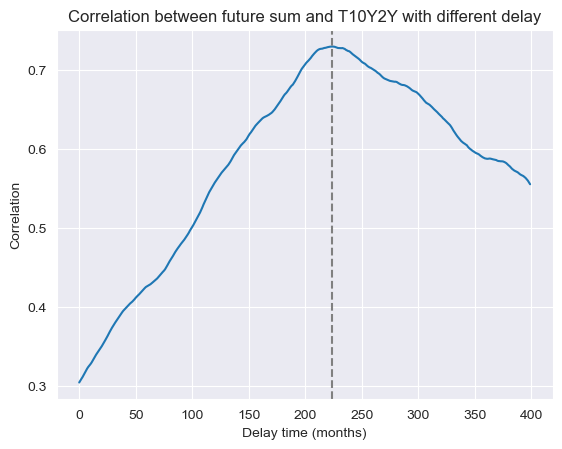

In [96]:
#plot the best delay time to ensure the solution is unique
plt.plot(range(len(value)),value)
plt.title("Correlation between future sum and T10Y2Y with different delay")
plt.xlabel("Delay time (months)")
plt.ylabel("Correlation")

plt.axvline(x=224, color='gray', linestyle='--')
plt.savefig("./pictures/Correlation_delay.jpg")

In [98]:
plt.clf()
#pearsonr testing
correlation_DF=pd.DataFrame({"normalize_AAPL_return":normalize_AAPL_return,
                             "normalize_T10Y2Y":(normalize_T10Y2Y.shift(i)*-1+1)})
correlation_DF=correlation_DF.dropna()
correlation_coefficient, p_value = pearsonr(correlation_DF['normalize_AAPL_return'],correlation_DF['normalize_T10Y2Y'])
print('\n', "pearsonr testing\ncorrelation_coefficient=", "{:.2f}".format(correlation_coefficient), '\n', "p_value=", "{:.2e}".format(p_value))


 pearsonr testing
correlation_coefficient= 0.55 
 p_value= 3.61e-92


<Figure size 640x480 with 0 Axes>

In [99]:
all_Data=all_Data.drop(columns=["logPriceDiff","Change_Percentage","future_sum"])

In [100]:
all_Data.to_csv("./data/ALL_cleaned.csv",index=False)